## Briefly review 1D kernels for piecewise linear constraints
* before the 2D kernels show the 1D kernels first
* first, we can enforce separate rho_0 slopes for rho_0 across 1 using the piecewise linear kernel such as:
    * regular linear kernel: $ k(x,x') = 1 + xx'
    * absolute value kernel: $ k(x,x') = 1 + relu(xx') $
    * left abs value kernel: $ k(x,x') = 1 + relu(-x) * relu(-x') $
    * right abs value kernel: $ k(x,x') = 1 + relu(x) * relu(x') $

In [16]:
# 1D kernel plotting utility
import numpy as np, matplotlib.pyplot as plt

def plot_1d_kernel(kernel_func, nsamples=100):
    npts = 100
    blues = plt.cm.jet(np.linspace(0, 1, nsamples))
    xvec = np.linspace(-3.0, 3.0, npts)
    mean = np.zeros((npts,))
    cov = np.array([[kernel_func(xvec[i], xvec[j]) for i in range(npts)] for j in range(npts)])
    samples = np.random.multivariate_normal(mean, cov, size=nsamples)

    for isample, sample in enumerate(samples):
        plt.plot(xvec, sample, color=blues[isample], alpha=0.7, linewidth=2)
    plt.show()


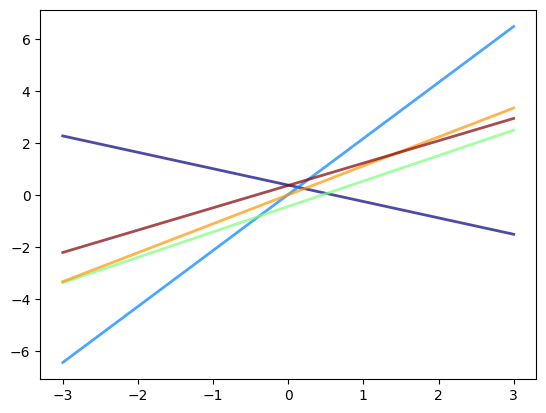

In [17]:
# 1D linear kernel
linear_kernel = lambda x, xp : 0.3 + x * xp
plot_1d_kernel(linear_kernel, nsamples=5)

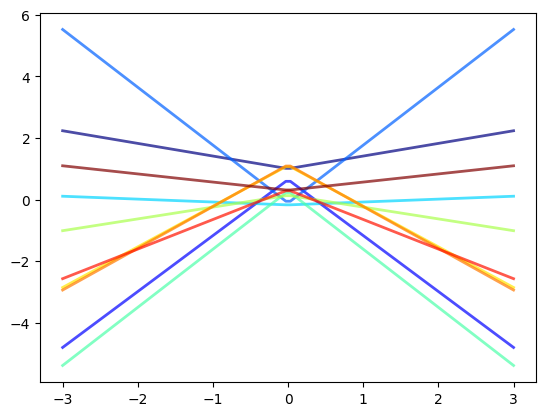

In [27]:
# 1D symmetric abs value kernel
sym_abs_val_kernel = lambda x, xp : 0.3 + np.abs(x * xp)
plot_1d_kernel(sym_abs_val_kernel, nsamples=10)

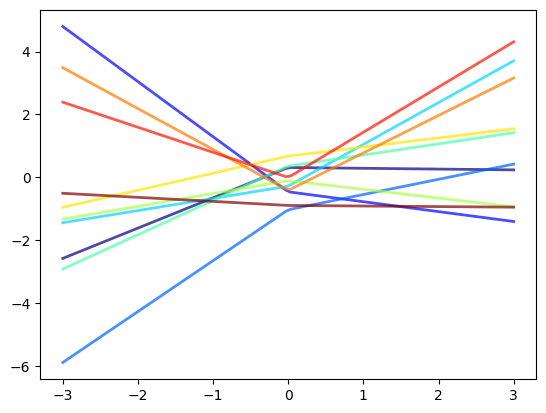

In [30]:
# 1D general absolute value kernel
relu = lambda x : max([0, x])
gen_abs_val_kernel = lambda x, xp : 0.3 + relu(x * xp)
plot_1d_kernel(gen_abs_val_kernel, nsamples=10)

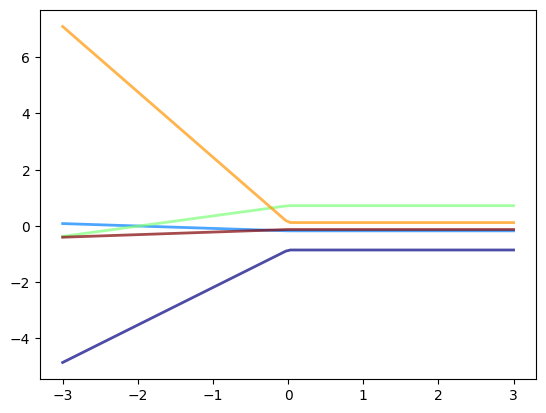

In [31]:
# 1D left half linear kernel
left_half_lin_kernel = lambda x, xp : 0.3 + relu(-x) * relu(-xp)
plot_1d_kernel(left_half_lin_kernel, nsamples=5)

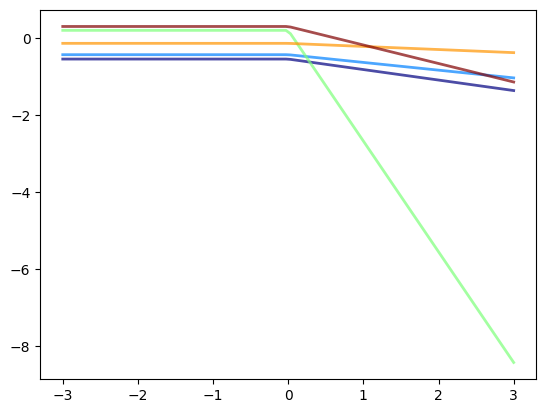

In [32]:
# 1D right half linear kernel
right_half_lin_kernel = lambda x, xp : 0.3 + relu(x) * relu(xp)
plot_1d_kernel(right_half_lin_kernel, nsamples=5)